# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
mars = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
# whole table object
table = mars.select_one('tbody')

# headers row
headers = mars.find_all('th')
headers = [header.text for header in headers]

# all data rows
rows = table.find_all('td')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
row_list = []
row_dict = {}
# Loop through the scraped data to create a list of rows
# count for tracking column
n=0
for row in rows:
    
    row_dict[f'{headers[n]}'] = row.text.strip()
    n+=1
    
    if n==7:
        row_list.append(row_dict)
        row_dict = {}
        n = 0
    else:
        continue
        
row_list
        
    

[{'id': '2',
  'terrestrial_date': '2012-08-16',
  'sol': '10',
  'ls': '155',
  'month': '6',
  'min_temp': '-75.0',
  'pressure': '739.0'},
 {'id': '13',
  'terrestrial_date': '2012-08-17',
  'sol': '11',
  'ls': '156',
  'month': '6',
  'min_temp': '-76.0',
  'pressure': '740.0'},
 {'id': '24',
  'terrestrial_date': '2012-08-18',
  'sol': '12',
  'ls': '156',
  'month': '6',
  'min_temp': '-76.0',
  'pressure': '741.0'},
 {'id': '35',
  'terrestrial_date': '2012-08-19',
  'sol': '13',
  'ls': '157',
  'month': '6',
  'min_temp': '-74.0',
  'pressure': '732.0'},
 {'id': '46',
  'terrestrial_date': '2012-08-20',
  'sol': '14',
  'ls': '157',
  'month': '6',
  'min_temp': '-74.0',
  'pressure': '740.0'},
 {'id': '57',
  'terrestrial_date': '2012-08-21',
  'sol': '15',
  'ls': '158',
  'month': '6',
  'min_temp': '-78.0',
  'pressure': '740.0'},
 {'id': '68',
  'terrestrial_date': '2012-08-22',
  'sol': '16',
  'ls': '158',
  'month': '6',
  'min_temp': '-77.0',
  'pressure': '740.0'},


In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(row_list)


In [8]:
# Confirm DataFrame was created successfully
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
print(mars_df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [10]:
# Change data types for data analysis
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df.sol = mars_df.sol.astype('int64')
mars_df.ls = mars_df.ls.astype('int64')
mars_df.month = mars_df.month.astype('int64')
mars_df.min_temp = mars_df.min_temp.astype(float)
mars_df.pressure = mars_df.pressure.astype(float)

In [11]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
one = mars_df['month'].groupby(mars_df['month']).count()
one

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [13]:
# mine
# 2. How many Martian days' worth of data are there?
two = mars_df['sol'].count()
two

1867

In [14]:
# 3. What is the average low temperature by month?
three = mars_df['min_temp'].groupby(mars_df['month']).mean()
three

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

In [15]:
# create new data frame for min_temp monthly data
three_df = pd.DataFrame(three)
three_df

,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


''

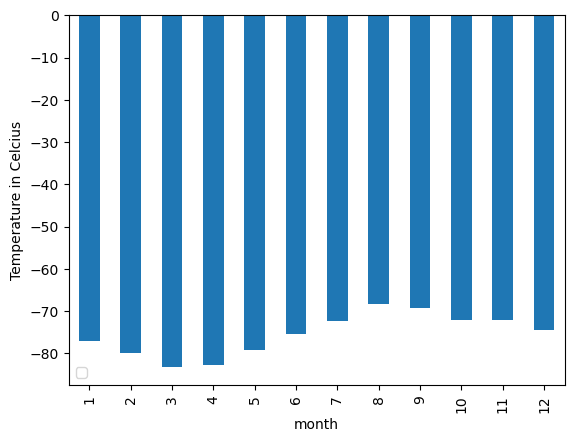

In [46]:
# Plot the average temperature by month
three_df.plot.bar()
plt.ylabel('Temperature in Celcius')
plt.legend('')
;

''

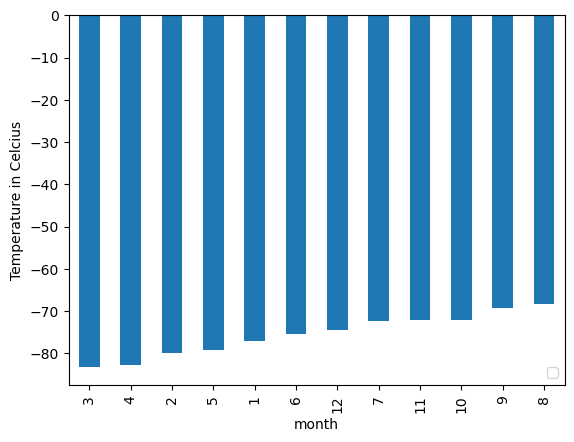

In [47]:
# Identify the coldest and hottest months in Curiosity's location

# sort df in descending order
three_df_sorted = three_df.sort_values(by='min_temp')
three_df_sorted.plot.bar()
plt.ylabel('Temperature in Celcius')
plt.legend('')
;

In [48]:
# 4. Average pressure by Martian month
four = mars_df['pressure'].groupby(mars_df['month']).mean()

# create df
pressure_df = pd.DataFrame(four)
# sort df
pressure_df = pressure_df.sort_values(by='pressure')


''

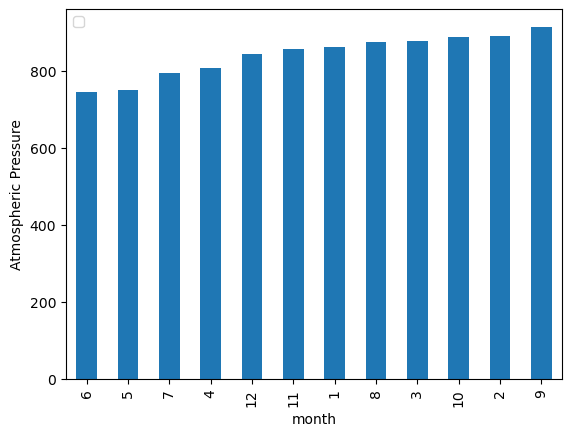

In [49]:
# mine
# Plot the average pressure by month

pressure_df.plot.bar()
plt.ylabel('Atmospheric Pressure')
plt.legend('')
;

In [82]:
1188 - 533
#488

655

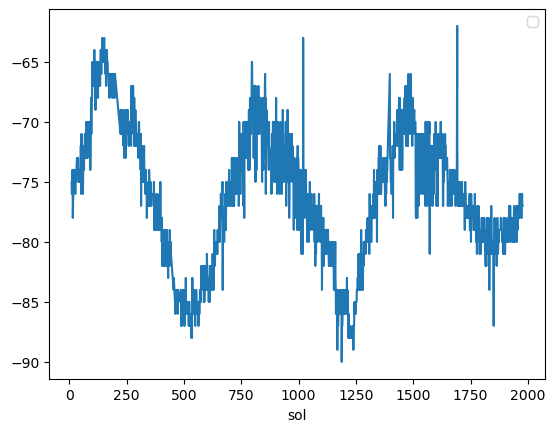

In [51]:
# 5. How many terrestrial (earth) days are there in a Martian year?
plt.ion
mars_df.plot.line(x = 'sol',y = 'min_temp')
plt.legend('')

In [33]:
mars_df.sort_values(by='min_temp')
a = mars_df.loc[mars_df['min_temp'] >= -66]
a

,id,terrestrial_date,sol,ls,month,min_temp,pressure
86,3,2012-11-16,100,207,7,-66.0,829.0
87,4,2012-11-17,101,208,7,-65.0,830.0
89,6,2012-11-19,103,209,7,-66.0,836.0
91,8,2012-11-21,105,211,8,-66.0,839.0
92,9,2012-11-23,106,211,8,-66.0,841.0
...,...,...,...,...,...,...,...
926,938,2015-06-20,1020,0,1,-63.0,832.0
1292,1318,2016-07-12,1398,184,7,-66.0,751.0
1373,1398,2016-10-03,1479,234,8,-66.0,890.0
1384,1411,2016-10-15,1490,241,9,-66.0,904.0


## Month with the Lowest Temperature
The third month is, on average, the coldest month while the eighth month is the warmest.

## Month with the Lowest Atmospheric Pressure
On average, the third month has the lowest atmospheric pressure, while the ninth month has the greatest atmospheric pressure.

## Length of a Martian Year
Using the data in mars_df, I estimate that a Martian year is roughly 683 earth days long. I calculated this number by locating the two highest minimum temperature measurements on the plot of minimum temperature vs the number of terrestrial days. The first max value is at 796 days, while the second occurs at 1479. The difference in days between these 2 peaks represents a Martian year. According to Nasa, one year on Mars is 687 earth days, so my estimate is very accurate.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [35]:
# Write the data to a CSV
mars_df.to_csv("../Output/mars_df.csv", index=False, header=True)

In [36]:
browser.quit()